In [9]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets
import copy

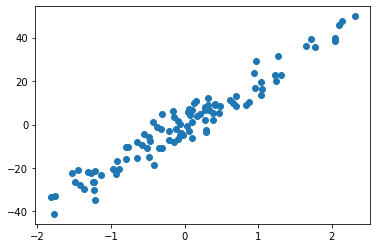

In [6]:
x,y = sklearn.datasets.make_regression(n_features=1,noise=5,random_state=2020)
plt.scatter(x,y)
plt.show()

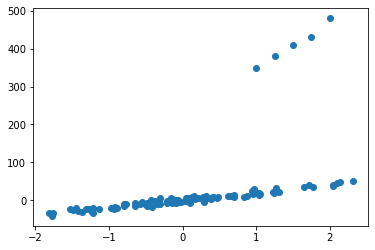

In [7]:
#Add 5 abnormal data
a = np.linspace(1,2,5).reshape(-1,1)
b = np.array([350,380,410,430,480])
#Generate a new data set
x_1 = np.r_[x,a]
y_1 = np.r_[y,b]
plt.scatter(x_1,y_1)
plt.show()

Raw sample fitting parameters：
 [[ 0.19400162]
 [19.7401935 ]]


New sample fitting parameters：
 [[16.17469147]
 [47.08997923]]


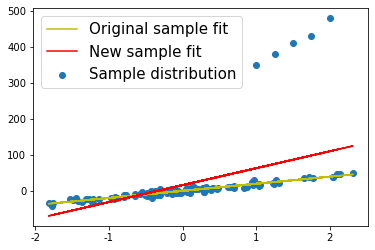

In [8]:
class normal():
    def __init__(self):
        pass

    def fit(self,x,y):
        m=x.shape[0]
        X = np.concatenate((np.ones((m,1)),x),axis=1)
        xMat=np.mat(X)
        yMat =np.mat(y.reshape(-1,1))

        xTx=xMat.T*xMat
        #xTx.I is the Inverse matrix of xTx
        ws=xTx.I*xMat.T*yMat
        
        return ws
         


#plt.rcParams['font.sans-serif']=['SimHei'] #Used to display Chinese labels normally
plt.rcParams['axes.unicode_minus']=False #Used to display the negative sign normally
clf1 =normal()
#Fit the original data
w1 = clf1.fit(x,y)
#Forecast data
y_pred = x * w1[1] + w1[0]

#Fit the new original data
w2 = clf1.fit(x_1,y_1)
#Forecast new data
y_1_pred = x_1 * w2[1] + w2[0]

print('Raw sample fitting parameters：\n',w1)
print('\n')
print('New sample fitting parameters：\n',w2)

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

The first parameter of W is the intercept, and the second parameter is the slope, which is the coefficient. It can be seen that the coefficient has become much larger. Just because a few noises are added, the robustness of the model is very poor, and the generalization ability is also Poor, a certain degree of overfitting has occurred.

In [10]:
 def CoordinateDescent(x, y,epochs,learning_rate,Lambda):        
        m=x.shape[0]
        X = np.concatenate((np.ones((m,1)),x),axis=1)
        xMat=np.mat(X)
        yMat =np.mat(y.reshape(-1,1))
        
        
        w = np.ones(X.shape[1]).reshape(-1,1)
        
        
        for n in range(epochs):
            
            
            out_w = copy.copy(w)
            for i,item in enumerate(w):
                #Find the point where the loss function converges at each value of W
                for j in range(epochs):
                    h = xMat * w 
                    gradient = xMat[:,i].T * (h - yMat)/m + Lambda * np.sign(w[i])
                    w[i] = w[i] - gradient* learning_rate
                    if abs(gradient)<1e-3:
                        break
            out_w = np.array(list(map(lambda x:abs(x)<1e-3, out_w-w)))
            if out_w.all():
                break
        return  w

In [ ]:
#Linear regression
#Lambda=0
#the parameter becomes more than 47 points when Lambda = 10
w = CoordinateDescent(x_1,y_1,epochs=250,learning_rate=0.001,Lambda=0)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

[[ 6.91937609]
 [37.5210457 ]]


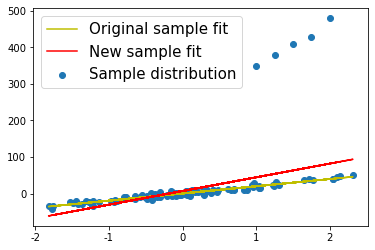

In [11]:
#Lambda=10
#the parameter becomes more than 37 points when Lambda = 10
w = CoordinateDescent(x_1,y_1,epochs=250,learning_rate=0.001,Lambda=10)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

[[ 0.03522988]
 [17.46323819]]


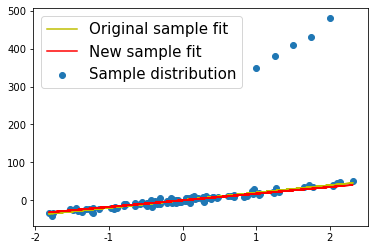

In [13]:
#Lambda=30
#the parameter becomes more than 17 points when Lambda = 30
w = CoordinateDescent(x_1,y_1,epochs=250,learning_rate=0.001,Lambda=30)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

[[ 0.01932045]
 [-0.04839138]]


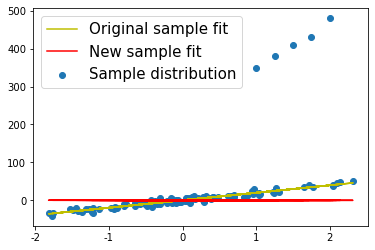

In [14]:
#Lambda=100
#the parameter becomes under 0 points when Lambda = 100
w = CoordinateDescent(x_1,y_1,epochs=250,learning_rate=0.001,Lambda=100)
print(w)

#Calculate new fitted values
y_1_pred = x_1 * w[1] + w[0]

ax1= plt.subplot()
ax1.scatter(x_1,y_1,label='Sample distribution')
ax1.plot(x,y_pred,c='y',label='Original sample fit')
ax1.plot(x_1,y_1_pred,c='r',label='New sample fit')
ax1.legend(prop = {'size':15}) #This parameter changes the size of the label font size
plt.show()

In [15]:
#Approximate gradient descent method to achieve Lasso regression
#Based on the code of the gradient descent method, the calculation of the gradient is changed, and sign(w) is added, that is, the derivative of the L1 regular term is added
class lasso():
    def __init__(self):
        pass
    
    #Gradient descent method iterative training model parameters, x is the feature data, y is the label data, a is the learning rate, and epochs is the number of iterations
    def fit(self,x,y,a,epochs,Lambda):  
        m=x.shape[0]
        #a bias term to x
        X = np.concatenate((np.ones((m,1)),x),axis=1)
        #Calculate the total number of features
        n = X.shape[1]
        #Initialize the value of W, to become a matrix form
        W=np.mat(np.ones((n,1)))
        #X is converted to matrix form
        xMat = np.mat(X)
        #y is converted to matrix form, this step is very important, and it must be a dimension lattice of m x 1
        yMat =np.mat(y.reshape(-1,1))
        #Make loop epochs times
        for i in range(epochs):
            gradient = xMat.T*(xMat*W-yMat)/m + Lambda * np.sign(W)
            W=W-a * gradient
        return W
    def predict(self,x,w):  #The x here should also be biased. What dimension of data is x during training, and the prediction should remain the same

        return np.dot(x,w)

In [16]:
#As the alpha value increases, that is, the coefficient of the regular term increases, 
#the coefficient becomes more and more sparse, and more coefficients become 0
clf = lasso()
L0 = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda = 0)
print("Lambda = 0",L0)
L10 = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda = 10)
print("Lambda = 10",L10)
L30 = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda = 30)
print("Lambda = 30",L30)
L50 = clf.fit(x_1,y_1,a = 0.001,epochs = 10000,Lambda = 50)
print("Lambda = 50",L50)

Lambda = 0 [[16.17584512]
 [47.08705269]]
Lambda = 10 [[ 6.91880206]
 [37.52178868]]
Lambda = 30 [[8.02775060e-04]
 [1.74625486e+01]]
Lambda = 50 [[0.05580499]
 [0.06831762]]
